<a href="https://colab.research.google.com/github/ydrisdongmo/-iris_app-/blob/main/Bienvenue_dans_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
# Importation des bibliothèques de base nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np  # Importer NumPy
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [170]:
df=pd.read_csv('MathE dataset.csv', delimiter=";", encoding='cp1252')

In [171]:
# Afficher les premières lignes du jeu de données
print(df.head())

   Student ID Student Country  Question ID  Type of Answer Question Level  \
0         647         Ireland           77               0          Basic   
1          41        Portugal           77               1          Basic   
2         340        Portugal           77               1          Basic   
3         641           Italy           77               0          Basic   
4         669        Portugal           77               1          Basic   

        Topic    Subtopic                                           Keywords  
0  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
1  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
2  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
3  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
4  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  


In [141]:
#Eencoder les cariables cathegoielles
label_encoders = {}
for column in ['Student Country','Type of Answer','questin Level','Topic','Subtopic']:
    le= LabelEncoder()
    label_encoders[column]=le

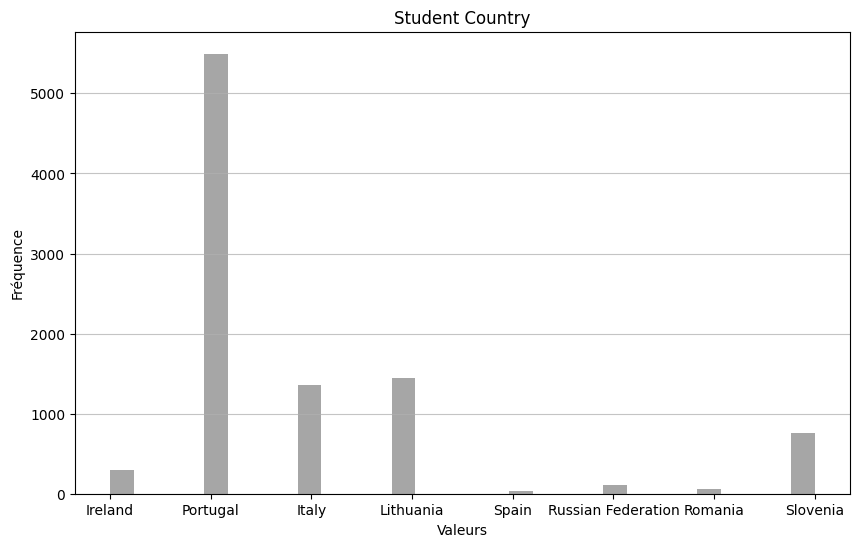

In [206]:
plt.figure(figsize=(10, 6))
plt.hist(df['Student Country'], bins=30, alpha=0.7, color='gray')
plt.title('Student Country')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.grid(axis='y', alpha=0.75)
plt.show()

<Axes: xlabel='Student Country', ylabel='count'>

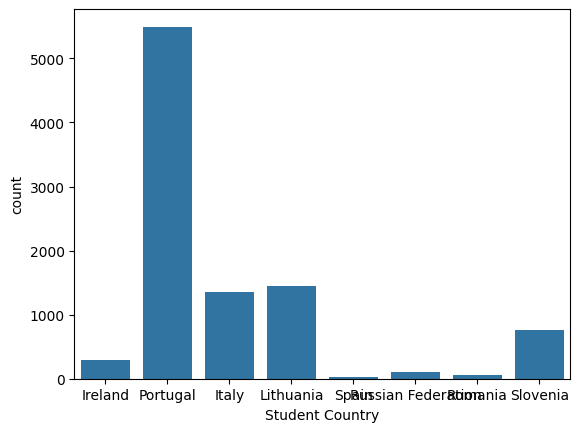

In [159]:
# Visualisation de la distribution de la variable cible
sns.countplot(x=df['Student Country'])


In [134]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())



Student ID         0
Student Country    0
Question ID        0
Type of Answer     0
Question Level     0
Topic              0
Subtopic           0
Keywords           0
dtype: int64


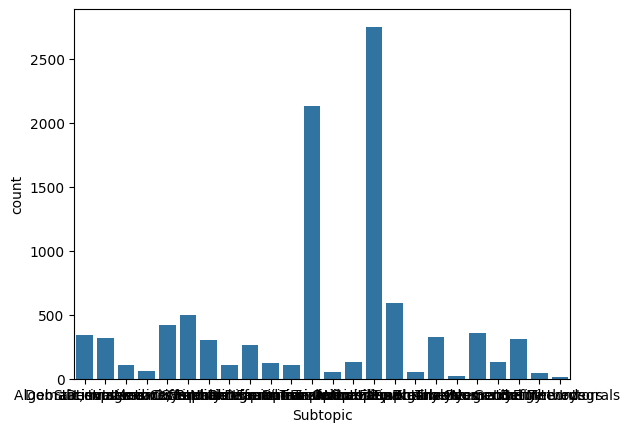

In [130]:
# Remplacez 'Subtopic' par le nom correct si nécessaire
sns.countplot(x='Subtopic', data=df)
plt.show()


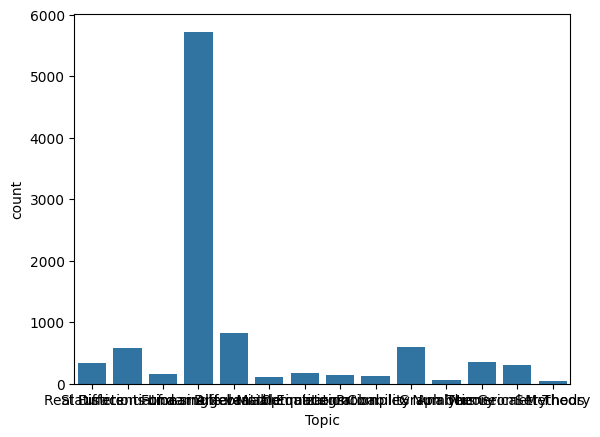

In [131]:
sns.countplot(x='Topic', data=df)
plt.show()

In [188]:
# Supprimer les valeurs manquantes
df = df.dropna()


In [189]:
# Encoder les variables catégoriques
encoder = LabelEncoder()
df['Topic'] = encoder.fit_transform(df['Topic'])



In [198]:
# Chargement des données

# Afficher les colonnes avant la suppression
print("Colonnes avant la suppression :", df.columns)

# Supprimer une colonne, par exemple, 'Keywords'
df = df.drop('Keywords', axis=1)

# Afficher les colonnes après la suppression
print("Colonnes après la suppression :", df.columns)

Colonnes avant la suppression : Index(['Student ID', 'Student Country', 'Question ID', 'Type of Answer',
       'Question Level', 'Topic', 'Subtopic', 'Keywords'],
      dtype='object')
Colonnes après la suppression : Index(['Student ID', 'Student Country', 'Question ID', 'Type of Answer',
       'Question Level', 'Topic', 'Subtopic'],
      dtype='object')


In [178]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoder la colonne 'Type of Answer'
label_encoder = LabelEncoder()
df['Type of Answer'] = label_encoder.fit_transform(df['Type of Answer'])

In [210]:
# Afficher les premières lignes pour vérifier les colonnes
print("Données originales :")
print(df[['Question ID', 'Question Level']].head())

Données originales :
   Question ID Question Level
0           77          Basic
1           77          Basic
2           77          Basic
3           77          Basic
4           77          Basic


In [211]:
# Normaliser les colonnes numériques
scaler = StandardScaler()
df[['Question ID', 'Question Level']] = scaler.fit_transform(df[['Question ID', 'Question Level']])

ValueError: could not convert string to float: 'Basic'

In [208]:
# Afficher les résultats normalisés
print("\nDonnées normalisées :")
print(df[['Question ID', 'Question Level']].head())


Données normalisées :
   Question ID Question Level
0           77          Basic
1           77          Basic
2           77          Basic
3           77          Basic
4           77          Basic


In [200]:
# Séparer les caractéristiques et la cible
X = df.drop(['Type of Answer'], axis=1)
y = df['Type of Answer']

In [196]:
# Séparer en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
# Créer et entraîner le modèle
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'Ireland'

# Afficher les premières lignes
print(df.head())

# Obtenir des informations sur les colonnes
print(df.info())

# Statistiques descriptives
print(df.describe()

In [197]:
# Afficher les premières lignes
print(df.head())

# Obtenir des informations sur les colonnes
print(df.info())

# Statistiques descriptives
print(df.describe())

   Student ID Student Country  Question ID  Type of Answer Question Level  \
0         647         Ireland           77               0          Basic   
1          41        Portugal           77               1          Basic   
2         340        Portugal           77               1          Basic   
3         641           Italy           77               0          Basic   
4         669        Portugal           77               1          Basic   

   Topic    Subtopic                                           Keywords  
0     13  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
1     13  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
2     13  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
3     13  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
4     13  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total

In [163]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Ou imputation si nécessaire
# df.fillna(value=0, inplace=True)  # Exemple d'imputation

Student ID         0
Student Country    0
Type of Answer     0
Question Level     0
Topic              0
Subtopic           0
dtype: int64


In [116]:
# Convertir les colonnes si nécessaire
df['Student ID'] = df['Student ID'].astype(int)
df['Type of Answer'] = df['Type of Answer'].astype('category')

In [117]:
# Encodage des variables catégorielles
df = pd.get_dummies(df, columns=['Student Country', 'Type of Answer', 'Topic', 'Subtopic'], drop_first=True)

In [118]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoder la colonne 'Question Level'
label_encoder = LabelEncoder()
df['Question Level'] = label_encoder.fit_transform(df['Question Level'])

# Maintenant, vous pouvez normaliser les colonnes numériques
scaler = StandardScaler()
df[['Question ID', 'Question Level']] = scaler.fit_transform(df[['Question ID', 'Question Level']])

# Afficher les résultats
print(df.head())

   Student ID  Question ID  Question Level  \
0         647     -1.61261        0.465812   
1          41     -1.61261        0.465812   
2         340     -1.61261        0.465812   
3         641     -1.61261        0.465812   
4         669     -1.61261        0.465812   

                                            Keywords  Student Country_Italy  \
0  Stem and Leaf diagram,Relative frequency,Sampl...                  False   
1  Stem and Leaf diagram,Relative frequency,Sampl...                  False   
2  Stem and Leaf diagram,Relative frequency,Sampl...                  False   
3  Stem and Leaf diagram,Relative frequency,Sampl...                   True   
4  Stem and Leaf diagram,Relative frequency,Sampl...                  False   

   Student Country_Lithuania  Student Country_Portugal  \
0                      False                     False   
1                      False                      True   
2                      False                      True   
3               

In [119]:
print(df.columns)

Index(['Student ID', 'Question ID', 'Question Level', 'Keywords',
       'Student Country_Italy', 'Student Country_Lithuania',
       'Student Country_Portugal', 'Student Country_Romania',
       'Student Country_Russian Federation', 'Student Country_Slovenia',
       'Student Country_Spain', 'Type of Answer_1', 'Topic_Complex Numbers',
       'Topic_Differential Equations', 'Topic_Differentiation',
       'Topic_Fundamental Mathematics', 'Topic_Graph Theory',
       'Topic_Integration', 'Topic_Linear Algebra', 'Topic_Numerical Methods',
       'Topic_Optimization', 'Topic_Probability ',
       'Topic_Real Functions of a single variable', 'Topic_Set Theory',
       'Topic_Statistics', 'Subtopic_Analytic Geometry',
       'Subtopic_Complex Numbers', 'Subtopic_Definite Integrals',
       'Subtopic_Derivatives', 'Subtopic_Differential Equations',
       'Subtopic_Domain, Image and Graphics', 'Subtopic_Double Integration',
       'Subtopic_Eigenvalues and Eigenvectors', 'Subtopic_Elementar

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

In [ ]:
df.to_csv('MathE_dataset_preprocessed.csv', index=False)

import pandas as pd

# Charger le fichier CSV
df = pd.read_csv('MathE dataset.csv', sep=';')

In [121]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Pour exécuter le code dans la cellule ci-dessus, sélectionnez-le en cliquant dessus, puis cliquez sur le bouton de lecture à gauche du code ou utilisez le raccourci clavier Commande/Ctrl+Entrée. Pour modifier le code, cliquez simplement sur la cellule.

Les variables que vous définissez dans une cellule peuvent être utilisées par la suite dans d'autres cellules :

In [122]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Les notebooks Colab vous permettent d'utiliser, dans un même document, du <strong>code exécutable</strong>, du <strong>texte enrichi</strong>, des <strong>images</strong>, du code <strong>HTML</strong>, du code <strong>LaTeX</strong> et bien plus. Lorsque vous créez des notebooks Colab, ils sont enregistrés dans votre compte Google Drive. Vous pouvez facilement les partager avec vos collaborateurs ou vos amis, qui peuvent alors y apporter des commentaires ou même les modifier. Pour en savoir plus, consultez la page <a href="/notebooks/basic_features_overview.ipynb">Présentation de Colaboratory</a>. Pour créer un notebook Colab, utilisez le menu "Fichier" ci-dessus ou le lien <a href="http://colab.research.google.com#create=true">Créer un notebook Colab</a>.

Les notebooks Colab sont des notebooks Jupyter hébergés par Colab. Pour en savoir plus sur le projet Jupyter, consultez le site Web <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Science des données
</div>

Colab vous permet de tirer pleinement parti des bibliothèques populaires Python pour analyser et visualiser des données. La cellule de code ci-dessous utilise <strong>numpy</strong> pour générer des données aléatoires et <strong>matplotlib</strong> pour les visualiser. Pour modifier le code, cliquez simplement sur la cellule.

Vous pouvez importer vos propres données dans les notebooks Colab depuis votre compte Google Drive, y compris depuis des feuilles de calcul, ainsi que depuis GitHub et de nombreuses autres sources. Pour en savoir plus sur l'importation de données et l'utilisation de Colab dans le domaine de la science des données, consultez les liens ci-dessous dans la section <a href="#working-with-data">Utiliser les données</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

Colab vous permet d'importer un ensemble de données d'images, d'entraîner un classificateur d'images sur cet ensemble et d'évaluer le modèle, tout cela avec <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">quelques lignes de code</a>. Les notebooks Colab exécutent ce code sur les serveurs cloud de Google. Vous avez donc à votre disposition toute la puissance du matériel Google, y compris les <a href="#using-accelerated-hardware">GPU et TPU</a>, quelle que soit la puissance de votre ordinateur. Vous n'avez besoin que d'un navigateur.

Colab est très largement utilisé par la communauté du machine learning, par exemple dans les applications suivantes :
- Premiers pas avec TensorFlow
- Développement et entraînement de réseaux de neurones
- Expérimentation avec les TPU
- Dissémination de la recherche en IA
- Création de tutoriels

Pour voir comment les notebooks Colab sont utilisés dans des applications de machine learning, reportez-vous aux <a href="#machine-learning-examples">exemples de machine learning</a> ci-dessous.

<div class="markdown-google-sans">

## Autres ressources

### Utiliser les notebooks dans Colab

</div>

- [Présentation de Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide de Markdown](/notebooks/markdown_guide.ipynb)
- [Importer des bibliothèques et installer des dépendances](/notebooks/snippets/importing_libraries.ipynb)
- [Enregistrer et charger des notebooks dans GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formulaires interactifs](/notebooks/forms.ipynb)
- [Widgets interactifs](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Utiliser les données
</div>

- [Chargement de données : Drive, Sheets et Google Cloud Storage](/notebooks/io.ipynb)
- [Graphiques : visualiser les données](/notebooks/charts.ipynb)
- [Premiers pas avec BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Cours d'initiation au Machine Learning

<div>

Vous trouverez ci-dessous quelques-uns des notebooks de la formation Google en ligne sur le machine learning. Consultez la <a href="https://developers.google.com/machine-learning/crash-course/">formation complète en ligne</a> pour en savoir plus.
- [Présentation du DataFrame pandas](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Régression linéaire avec tf.keras et des données synthétiques](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Utiliser le matériel accéléré
</div>

- [TensorFlow avec des GPU](/notebooks/gpu.ipynb)
- [TensorFlow avec des TPU](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Exemples

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">Échange de voix avec NeMo</a> : utilisez le kit Nvidia NeMo pour l'IA conversationnelle afin d'échanger une voix dans un fragment audio contre une voix générée par ordinateur.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Recyclage d'un classificateur d'images</a> : construisez un modèle Keras sur un classificateur d'images pré-entraîné pour faire la distinction entre différentes fleurs.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Classification de texte</a> : classez des avis sur des films provenant de la base de données IMDB comme <em>positifs</em> ou <em>négatifs</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transfert de style</a> : utilisez le deep learning pour transférer un style d'une image à une autre.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Questions/Réponses sur l'encodeur de phrases universel multilingue</a> : utilisez un modèle de machine learning afin de répondre aux questions issues de l'ensemble de données SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Interpolation vidéo</a> : prédisez ce qui s'est passé entre la première et la dernière image d'une vidéo.


In [123]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [124]:
df=pd.read_csv('MathE dataset.csv', delimiter=";", encoding='cp1252')

In [125]:
print(df.head())

   Student ID Student Country  Question ID  Type of Answer Question Level  \
0         647         Ireland           77               0          Basic   
1          41        Portugal           77               1          Basic   
2         340        Portugal           77               1          Basic   
3         641           Italy           77               0          Basic   
4         669        Portugal           77               1          Basic   

        Topic    Subtopic                                           Keywords  
0  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
1  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
2  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
3  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
4  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  


In [126]:
# Statistiques descriptives pour comprendre la distribution des caractéristiques
print(df.describe())

        Student ID  Question ID  Type of Answer
count  9546.000000  9546.000000     9546.000000
mean    775.402263   478.912319        0.468259
std     460.590559   249.244061        0.499018
min      26.000000    77.000000        0.000000
25%     380.000000   323.000000        0.000000
50%     885.000000   428.000000        0.000000
75%    1219.000000   571.000000        1.000000
max    1565.000000  1549.000000        1.000000


In [127]:
df

,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
0,647,Ireland,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
1,41,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
2,340,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
3,641,Italy,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
4,669,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
...,...,...,...,...,...,...,...,...
9541,175,Italy,1497,1,Basic,Complex Numbers,Complex Numbers,"Imaginary part,Conjugate number,Modulus of a c..."
9542,175,Italy,1514,0,Basic,Complex Numbers,Complex Numbers,Operations with complex numbers
9543,175,Italy,1521,0,Basic,Fundamental Mathematics,"Algebraic expressions, Equations, and Inequali...","Quadratic equations,Simplify expressions,Linea..."
9544,175,Italy,1526,1,Basic,Fundamental Mathematics,"Algebraic expressions, Equations, and Inequali...","Linear equations,Quadratic equations,Simplify ..."


In [128]:
print(df.head())

   Student ID Student Country  Question ID  Type of Answer Question Level  \
0         647         Ireland           77               0          Basic   
1          41        Portugal           77               1          Basic   
2         340        Portugal           77               1          Basic   
3         641           Italy           77               0          Basic   
4         669        Portugal           77               1          Basic   

        Topic    Subtopic                                           Keywords  
0  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
1  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
2  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
3  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
4  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
